# Статистический анализ взаимосвязи между вероятностью возникновения сердечно-сосудистых заболеваний и клиническими особенностями пациента

Этот блокнот содержит статистический анализ медицинских данных пациентов с целью определить, какие признаки оказывают значимое влияние на наличие сердечно-сосудистых заболеваний.

#### Импортируем используемые в работе библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, spearmanr

#### Глобальная настройка графиков

In [ ]:
sns.set_theme(style="whitegrid")

# Блок 1
## Описание данных

Загрузим датасет и проанализируем его 

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Блок 2
## Подготовка данных

#### Найдем ошибочные строки

In [6]:
filtered_df = df[(df["thal"] == 0) | (df["ca"] == 4)]
print(filtered_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
48    53    0   2       128   216    0        0      115      0      0.0   
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
251   43    1   0       132   247    1        0      143      1      0.1   
281   52    1   0       128   204    1        1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
92       2   4     2       1  
158      1   4     3       1  
163      2   4     2       1  
164      2   4     2       1  
251      1   4     3       0  
281      1   0     0       0  


#### Исключим ошибочные строки

In [7]:
df = df[df['ca'] < 4] 
df = df[df['thal'] > 0] 
print(f'The length of the data now is {len(df)} instead of 303!')

The length of the data now is 296 instead of 303!


#### Проверим, что ошибочных строк больше нет

In [8]:
filtered_df = df[(df["thal"] == 0) | (df["ca"] == 4)]
print(filtered_df)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


# Блок 3
## Описательная статистика и t-тесты (числовые признаки)

In [9]:
group_0 = df[df['target'] == 0]
group_1 = df[df['target'] == 1]

numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

results = []

for col in numeric_columns:
    mean_0 = group_0[col].mean()
    mean_1 = group_1[col].mean()
    t_stat, p_val = ttest_ind(group_0[col], group_1[col], equal_var=False)
    results.append({
        'Признак': col,
        'p-значение': round(p_val, 4),
        'Среднее (здоровые)': round(mean_0, 2),
        'Среднее (больные)': round(mean_1, 2),
        'Значимое различие': 'Да' if p_val < 0.05 else 'Нет'
    })

result_df = pd.DataFrame(results)

print(result_df.to_string(index=False))


 Признак  p-значение  Среднее (здоровые)  Среднее (больные) Значимое различие
     age      0.0001               56.74              52.64                Да
trestbps      0.0112              134.46             129.18                Да
    chol      0.1863              251.46             243.49               Нет
 thalach      0.0000              138.95             158.58                Да
 oldpeak      0.0000                1.60               0.60                Да


# Блок 4
## Визуализация: boxplot по группам

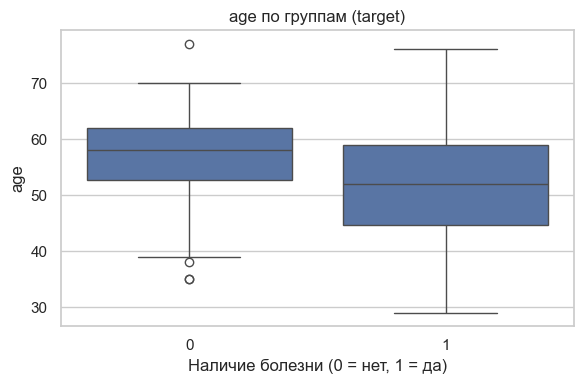

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='age', data=df)
plt.title('age по группам (target)')
plt.xlabel('Наличие болезни (0 = нет, 1 = да)')
plt.ylabel('age')
plt.tight_layout()
plt.show()

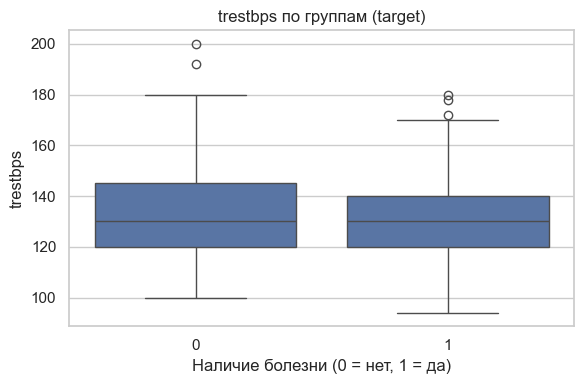

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('trestbps по группам (target)')
plt.xlabel('Наличие болезни (0 = нет, 1 = да)')
plt.ylabel('trestbps')
plt.tight_layout()
plt.show()

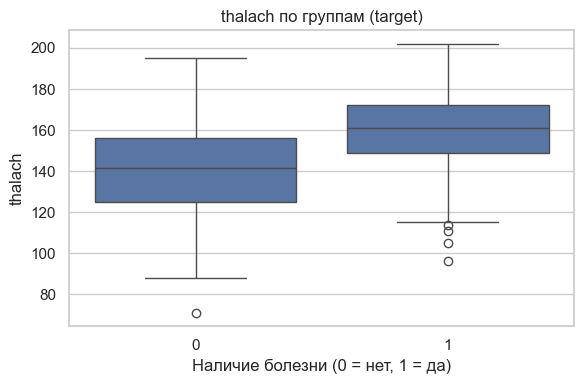

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('thalach по группам (target)')
plt.xlabel('Наличие болезни (0 = нет, 1 = да)')
plt.ylabel('thalach')
plt.tight_layout()
plt.show()

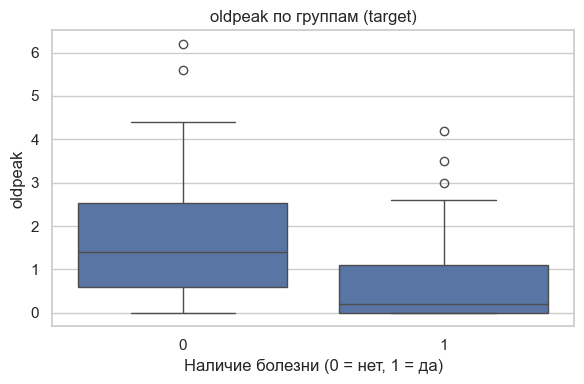

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('oldpeak по группам (target)')
plt.xlabel('Наличие болезни (0 = нет, 1 = да)')
plt.ylabel('oldpeak')
plt.tight_layout()
plt.show()

# Блок 5

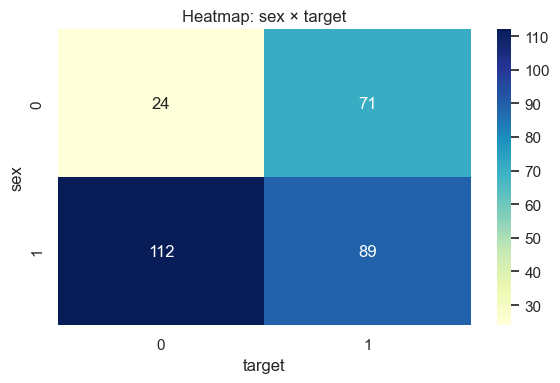

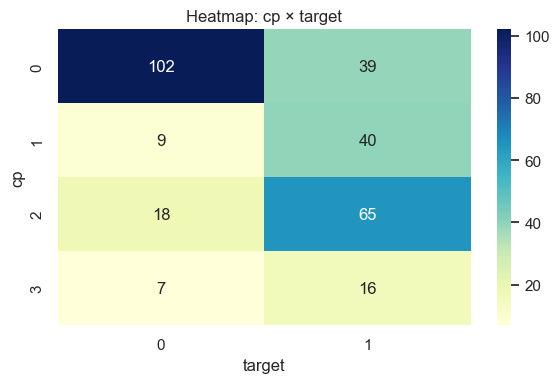

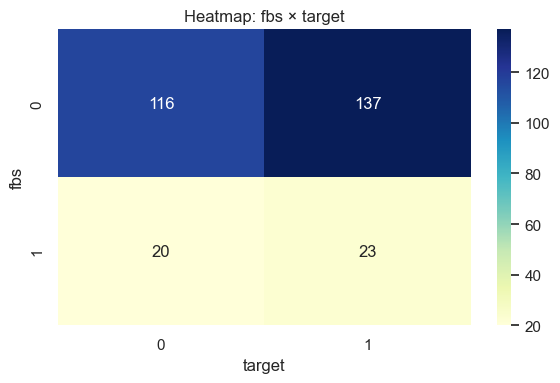

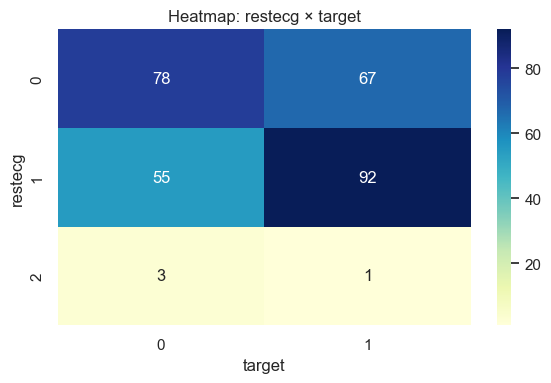

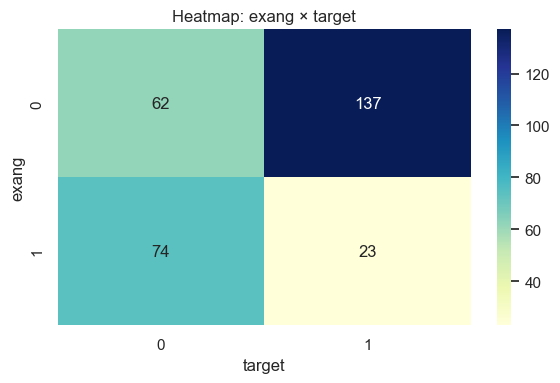

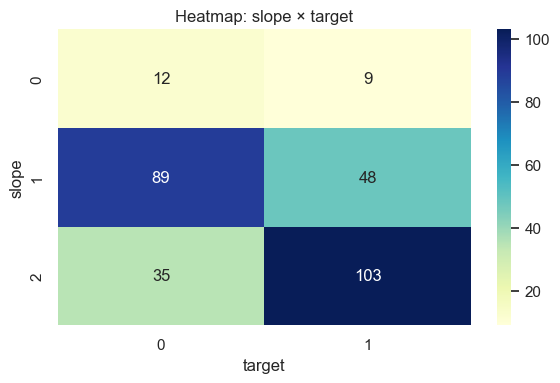

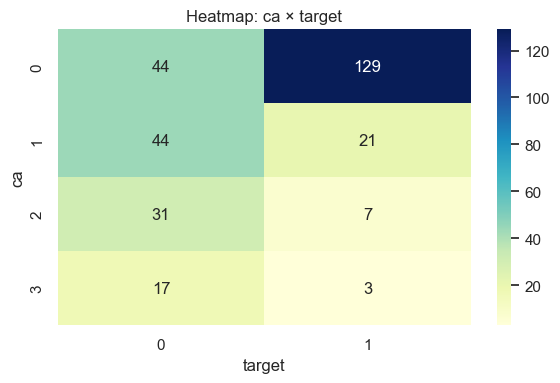

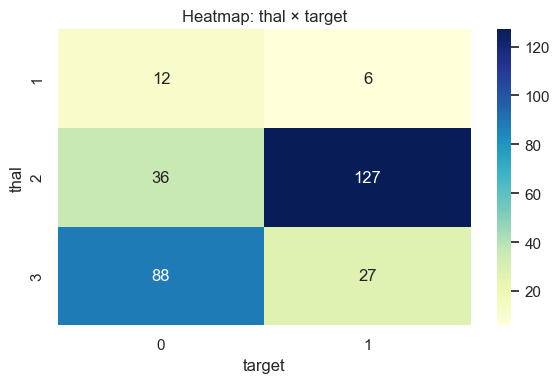

,Признак,χ²-статистика,Степени свободы,p-значение,Cramer's V,Значимая связь?
0,sex,22.89,1,0.00000,0.278,Да
1,cp,76.45,3,0.00000,0.508,Да
2,fbs,0.00,1,1.00000,0.000,Нет
3,restecg,9.26,2,0.00974,0.177,Да
4,exang,51.68,1,0.00000,0.418,Да
5,slope,44.55,2,0.00000,0.388,Да
6,ca,73.40,3,0.00000,0.498,Да
7,thal,83.76,2,0.00000,0.532,Да


In [14]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Функция для расчёта Cramer's V
def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.values.sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Результаты χ²-теста
chi2_results = []

for col in categorical_columns:
    contingency = pd.crosstab(df[col], df['target'])
    chi2, p, dof, _ = chi2_contingency(contingency)
    v = cramers_v(contingency)
    chi2_results.append({
        'Признак': col,
        'χ²-статистика': round(chi2, 2),
        'Степени свободы': dof,
        'p-значение': round(p, 5),
        "Cramer's V": round(v, 3),
        'Значимая связь?': 'Да' if p < 0.05 else 'Нет'
    })

    # Тепловая карта
    plt.figure(figsize=(6, 4))
    sns.heatmap(contingency, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Heatmap: {col} × target')
    plt.xlabel('target')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Выводим таблицу результатов χ²
chi2_df = pd.DataFrame(chi2_results)
display(chi2_df)

In [15]:
# Результаты корреляции Спирмена
spearman_results = []

for col in numeric_columns:
    rho, p = spearmanr(df[col], df['target'])
    spearman_results.append({
        'Признак': col,
        'ρ Спирмена': round(rho, 3),
        'p-значение': round(p, 5),
        'Значимая связь?': 'Да' if p < 0.05 else 'Нет'
    })

# Выводим таблицу
spearman_df = pd.DataFrame(spearman_results)
display(spearman_df)


,Признак,ρ Спирмена,p-значение,Значимая связь?
0,age,-0.238,0.00003,Да
1,trestbps,-0.127,0.02889,Да
2,chol,-0.111,0.05540,Нет
3,thalach,0.432,0.00000,Да
4,oldpeak,-0.417,0.00000,Да
